In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from pandas.plotting import autocorrelation_plot
from pandas import Series
from pandas import DataFrame
from pandas import concat
from pandas.plotting import lag_plot
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR
from statsmodels.graphics.tsaplots import plot_acf
import statsmodels.api as sm
from scipy import stats
from statsmodels.graphics.api import qqplot
from pandas.plotting import andrews_curves
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn import metrics
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.metrics import recall_score, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import Imputer, OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.model_selection import TimeSeriesSplit
from IPython.display import Image

/Users/TJR/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/TJR/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/TJR/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarn

In [2]:
oaksterdam_temp_hist = {"avgtemp13": [
             
             47,45,45,46,47,47,46,50,48,47,47,42,41,44,46,44,48,50,48,49,49,51,49,56,59,54,49,50,50,54,52,54,52,52,51,51,49,50,49,47,48,50,51,52,56,59,
             55,55,50,47,49,50,51,56,54,52,53,54,54,59,59,57,54,54,51,51,54,53,54,56,60,62,57,56,59,55,56,58,58,54,55,54,55,55,58,58,62,63,63,64,61,
             59,64,61,61,61,60,60,67,67,61,59,58,56,57,57,64,61,63,64,66,69,63,56,61,60,60,64,69,64,72,73,72,68,65,64,65,60,60,60,66,61,62,61,60,61,61,
             62,64,67,61,58,57,58,58,61,59,61,61,60,62,66,59,62,62,61,62,67,66,65,65,62,62,61,66,59,60,63,62,63,60,62,63,62,60,67,70,70,73,72,68,71,71,
             73,71,64,64,65,64,66,64,62,63,63,62,62,64,64,64,64,64,62,63,66,66,62,62,63,63,64,62,62,61,62,62,61,60,61,64,65,63,65,62,66,69,65,69,66,65,
             70,66,62,60,62,62,66,70,67,66,68,70,70,66,67,70,69,69,68,71,74,67,67,67,69,67,64,63,67,66,65,66,67,63,62,61,65,64,63,64,64,66,67,66,62,62,
             63,73,69,66,64,60,58,58,57,58,61,62,64,64,64,60,62,57,56,56,56,56,57,59,56,53,55,55,57,59,54,54,56,57,56,58,56,56,55,57,61,60,55,54,53,54,
             52,59,57,58,63,55,50,51,54,52,55,53,53,52,51,50,42,39,44,41,40,42,43,42,43,44,44,46,51,50,46,49,45,50,49,49,53,50,49,47,47,53,48,48],
           
           "avgtemp14": [
             
             47,49,52,50,53,48,51,50,52,50,49,49,55,58,60,56,49,52,50,51,50,51,55,52,56,56,53,56,58,55,51,47,48,48,47,45,50,53,57,58,54,54,55,57,58,55,
             55,50,53,56,53,56,55,56,58,57,58,61,59,62,57,56,61,60,58,57,59,63,62,61,66,58,60,62,60,59,57,59,60,56,58,57,59,54,58,61,63,57,56,53,52,
             53,54,56,56,61,65,67,59,63,58,59,61,59,59,62,58,58,59,63,59,59,56,59,55,53,58,59,67,73,71,63,61,63,61,61,58,60,62,61,65,66,74,75,70,63,61,
             63,62,63,63,62,61,61,65,62,61,62,64,59,61,62,60,60,61,60,61,63,70,68,63,64,61,64,67,61,61,62,68,61,64,59,60,63,62,63,65,64,65,67,70,64,64,
             62,61,63,62,62,63,64,67,67,64,65,67,68,68,68,67,67,68,69,70,70,73,75,69,70,67,68,66,65,65,64,65,67,68,69,65,66,63,67,67,68,68,66,66,67,65,
             64,67,68,68,69,68,67,68,69,68,68,67,68,69,70,66,69,68,66,66,66,64,65,68,70,67,67,67,70,68,69,70,66,67,67,69, 69,71,65,67,63,67,63,65,68,70,
             72,74,71,68,62,64,62,61,64,69,67,65,63,61,62,65,63,62,60,60,64,64,65,60,57,60,64,63,61,56,55,55,58,60,61,60,61,59,56,62,61,60,57,55,56,57,
             54,57,55,56,59,52,51,57,55,54,52,59,56,60,58,61,60,60,62,58,60,59,59,57,53,52,54,53,56,54,56,56,57,60,57,56,55,52,50,47,47,49,47,48],
                
            "avgtemp15": [
             
             47,41,43,45,46,49,51,52,55,54,50,49,55,49,50,50,53,57,55,52,51,51,52,58,50,51,57,53,53,54,59,53,54,57,55,56,61,59,58,57,54,53,58,58,59,58,
             59,56,57,56,59,57,56,54,50,55,56,56,52,54,52,53,54,56,57,58,55,57,56,58,60,61,66,62,61,59,58,60,57,63,60,59,59,60,65,58,61,60,56,62,55,
             59,56,54,54,54,55,55,55,56,60,61,56,57,59,65,60,58,56,58,57,59,58,58,57,58,66,58,59,67,65,59,58,55,57,58,57,56,58,57,57,58,57,60,57,57,59,
             57,59,61,60,59,58,57,58,59,58,58,57,59,59,65,61,60,62,61,64,65,72,66,64,65,65,65,61,58,62,61,59,62,61,62,59,62,64,68,66,66,66,65,70,67,67,
             67,66,68,67,67,65,63,67,68,69,68,65,68,68,68,68,74,71,65,65,65,67,65,65,69,72,70,68,67,69,68,70,69,67,65,69,66,66,67,67,67,70,69,75,77,70,
             68,69,66,66,68,67,68,67,69,72,77,71,70,69,67,68,65,64,65,68,73,76,77,74,70,67,68,67,65,66,65,67,71,74,76,62,64,73,66,65,65,62,64,61,67,64,
             62,63,65,66,67,68,67,67,66,69,73,68,66,67,66,66,64,67,64,63,63,63,63,66,64,63,63,62,64,63,58,56,56,54,56,55,55,54,52,50,52,56,52,32,54,56,
             53,55,57,58,53,52,53,46,46,47,49,45,44,48,50,50,50,47,54,54,54,60,56,51,48,52,50,49,47,48,52,51,46,54,56,52,48,44,45,40,42,42,44,44],
                        
                        
            "avgtemp16": [
             
             44,48,52,55,52,51,50,48,53,53,55,55,53,50,53,56,58,58,57,53,56,57,55,50,55,52,55,52,58,55,53,50,50,49,54,52,52,59,66,58,58,61,57,59,59,63,
             63,61,57,56,51,53,57,56,58,61,59,60,57,61,60,62,62,61,57,54,51,58,62,56,56,58,56,55,58,62,58,61,59,59,55,57,58,59,58,59,57,54,56,59,58,
             60,57,61,64,72,65,63,61,57,60,59,60,57,60,64,67,67,66,62,67,61,59,61,59,57,60,58,59,69,68,61,62,63,63,58,60,62,60,61,60,60,62,64,63,65,70,
             67,61,59,62,62,62,61,62,63,64,69,64,64,66,63,67,72,67,65,62,65,65,63,63,67,66,62,62,61,66,66,67,72,65,67,61,64,66,67,67,65,64,59,65,62,64,
             63,64,63,61,61,62,67,67,63,64,70,64,63,65,63,64,64,63,64,65,66,65,65,69,67,66,65,63,64,65,64,64,62,63,62,64,65,66,65,65,65,66,64,63,64,64,
             66,65,65,65,64,66,64,63,68,67,66,66,68,66,63,65,62,63,63,67,70,64,63,64,64,63,65,64,63,64,66,71,75,65,62,64,63,69,75,76,71,62,61,61,60,63,
             59,64,61,63,68,68,66,59,63,60,64,63,65,65,64,60,62,64,64,61,59,66,68,64,67,66,65,63,61,59,58,63,62,58,65,63,65,64,64,65,64,62,57,60,55,52,
             56,59,57,54,54,53,50,51,55,57,57,51,49,51,56,52,51,53,51,47,54,60,57,50,52,54,59,54,51,44,45,46,47,55,54,51,48,44,47,46,49,49,50,49],
                        
            "avgtemp17": [
             
            52,49,52,52,45,44,53,59,57,58,54,49,48,47,47,46,47,51,55,53,53,53,50,49,49,50,50,49,51,51,49,52,54,58,59,56,56,58,60,61,61,58,54,53,54,56,
            58,59,58,56,54,58,57,50,48,47,48,49,49,52,54,54,57,50,50,51,56,60,61,59,59,60,66,59,60,62,61,60,60,63,58,54,56,58,59,59,62,59,61,65,63,
            63,59,61,63,59,58,53,52,57,61,61,57,55,56,57,60,62,62,62,63,58,61,60,61,60,60,61,66,65,71,71,74,62,62,59,64,62,65,60,61,61,59,56,60,59,61,
            63,68,71,69,64,63,62,62,61,62,60,59,59,64,63,65,62,61,63,61,62,65,64,63,61,61,63,64,66,69,72,82,71,68,68,73,66,66,65,68,64,64,63,62,62,64,
            66,64,64,66,69,69,65,64,65,63,65,67,71,73,66,64,64,65,65,70,66,67,66,65,66,61,61,63,63,65,70,69,67,66,65,66,64,62,63,64,62,63,61,63,66,65,
            66,65,68,67,66,63,62,63,68,69,69,63,63,72,81,84,78,72,73,69,68,65,68,75,75,73,68,65,64,62,64,66,65,64,62,60,64,63,66,72,71,68,62,64,62,62,
            62,62,63,65,64,63,66,63,57,58,58,62,63,63,63,53,59,57,56,60,68,76,69,67,66,59,57,58,56,56,56,59,56,53,54,52,55,63,56,57,56,60,57,58,57,53,
            50,49,60,60,59,59,59,62,60,52,50,51,52,50,49,52,51,53,51,52,51,50,49,48,47,47,49,48,52,53,48,47,50,47,43,47,48,49,48,46,47,48,46,50],
           
           "day": [
               
            1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,
            51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,
            97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,
            131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,
            164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,
            197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,
            230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,
            263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,
            296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,
            329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,
            362,363,364,365]}
           
oaksterdam_temp_hist = pd.DataFrame(oaksterdam_temp_hist, index=[
             
1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,
53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,
101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,
136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,
171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,
206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,
241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,
276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,
311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,
346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365])
         
oaksterdam_temp_hist_alpha = oaksterdam_temp_hist[['day', 'avgtemp17', 'avgtemp16', 'avgtemp15', 'avgtemp14', 'avgtemp13']]

oaksterdam_temp_hist_alpha.head(15)

,day,avgtemp17,avgtemp16,avgtemp15,avgtemp14,avgtemp13
1,1,52,44,47,47,47
2,2,49,48,41,49,45
3,3,52,52,43,52,45
4,4,52,55,45,50,46
5,5,45,52,46,53,47
6,6,44,51,49,48,47
7,7,53,50,51,51,46
8,8,59,48,52,50,50
9,9,57,53,55,52,48
10,10,58,53,54,50,47


In [3]:
s1 = pd.Series([             
             47,45,45,46,47,47,46,50,48,47,47,42,41,44,46,44,48,50,48,49,49,51,49,56,59,54,49,50,50,54,52,54,52,52,51,51,49,50,49,47,48,50,51,52,56,59,
             55,55,50,47,49,50,51,56,54,52,53,54,54,59,59,57,54,54,51,51,54,53,54,56,60,62,57,56,59,55,56,58,58,54,55,54,55,55,58,58,62,63,63,64,61,
             59,64,61,61,61,60,60,67,67,61,59,58,56,57,57,64,61,63,64,66,69,63,56,61,60,60,64,69,64,72,73,72,68,65,64,65,60,60,60,66,61,62,61,60,61,61,
             62,64,67,61,58,57,58,58,61,59,61,61,60,62,66,59,62,62,61,62,67,66,65,65,62,62,61,66,59,60,63,62,63,60,62,63,62,60,67,70,70,73,72,68,71,71,
             73,71,64,64,65,64,66,64,62,63,63,62,62,64,64,64,64,64,62,63,66,66,62,62,63,63,64,62,62,61,62,62,61,60,61,64,65,63,65,62,66,69,65,69,66,65,
             70,66,62,60,62,62,66,70,67,66,68,70,70,66,67,70,69,69,68,71,74,67,67,67,69,67,64,63,67,66,65,66,67,63,62,61,65,64,63,64,64,66,67,66,62,62,
             63,73,69,66,64,60,58,58,57,58,61,62,64,64,64,60,62,57,56,56,56,56,57,59,56,53,55,55,57,59,54,54,56,57,56,58,56,56,55,57,61,60,55,54,53,54,
             52,59,57,58,63,55,50,51,54,52,55,53,53,52,51,50,42,39,44,41,40,42,43,42,43,44,44,46,51,50,46,49,45,50,49,49,53,50,49,47,47,53,48,48,             
             47,49,52,50,53,48,51,50,52,50,49,49,55,58,60,56,49,52,50,51,50,51,55,52,56,56,53,56,58,55,51,47,48,48,47,45,50,53,57,58,54,54,55,57,58,55,
             55,50,53,56,53,56,55,56,58,57,58,61,59,62,57,56,61,60,58,57,59,63,62,61,66,58,60,62,60,59,57,59,60,56,58,57,59,54,58,61,63,57,56,53,52,
             53,54,56,56,61,65,67,59,63,58,59,61,59,59,62,58,58,59,63,59,59,56,59,55,53,58,59,67,73,71,63,61,63,61,61,58,60,62,61,65,66,74,75,70,63,61,
             63,62,63,63,62,61,61,65,62,61,62,64,59,61,62,60,60,61,60,61,63,70,68,63,64,61,64,67,61,61,62,68,61,64,59,60,63,62,63,65,64,65,67,70,64,64,
             62,61,63,62,62,63,64,67,67,64,65,67,68,68,68,67,67,68,69,70,70,73,75,69,70,67,68,66,65,65,64,65,67,68,69,65,66,63,67,67,68,68,66,66,67,65,
             64,67,68,68,69,68,67,68,69,68,68,67,68,69,70,66,69,68,66,66,66,64,65,68,70,67,67,67,70,68,69,70,66,67,67,69, 69,71,65,67,63,67,63,65,68,70,
             72,74,71,68,62,64,62,61,64,69,67,65,63,61,62,65,63,62,60,60,64,64,65,60,57,60,64,63,61,56,55,55,58,60,61,60,61,59,56,62,61,60,57,55,56,57,
             54,57,55,56,59,52,51,57,55,54,52,59,56,60,58,61,60,60,62,58,60,59,59,57,53,52,54,53,56,54,56,56,57,60,57,56,55,52,50,47,47,49,47,48,             
             47,41,43,45,46,49,51,52,55,54,50,49,55,49,50,50,53,57,55,52,51,51,52,58,50,51,57,53,53,54,59,53,54,57,55,56,61,59,58,57,54,53,58,58,59,58,
             59,56,57,56,59,57,56,54,50,55,56,56,52,54,52,53,54,56,57,58,55,57,56,58,60,61,66,62,61,59,58,60,57,63,60,59,59,60,65,58,61,60,56,62,55,
             59,56,54,54,54,55,55,55,56,60,61,56,57,59,65,60,58,56,58,57,59,58,58,57,58,66,58,59,67,65,59,58,55,57,58,57,56,58,57,57,58,57,60,57,57,59,
             57,59,61,60,59,58,57,58,59,58,58,57,59,59,65,61,60,62,61,64,65,72,66,64,65,65,65,61,58,62,61,59,62,61,62,59,62,64,68,66,66,66,65,70,67,67,
             67,66,68,67,67,65,63,67,68,69,68,65,68,68,68,68,74,71,65,65,65,67,65,65,69,72,70,68,67,69,68,70,69,67,65,69,66,66,67,67,67,70,69,75,77,70,
             68,69,66,66,68,67,68,67,69,72,77,71,70,69,67,68,65,64,65,68,73,76,77,74,70,67,68,67,65,66,65,67,71,74,76,62,64,73,66,65,65,62,64,61,67,64,
             62,63,65,66,67,68,67,67,66,69,73,68,66,67,66,66,64,67,64,63,63,63,63,66,64,63,63,62,64,63,58,56,56,54,56,55,55,54,52,50,52,56,52,32,54,56,
             53,55,57,58,53,52,53,46,46,47,49,45,44,48,50,50,50,47,54,54,54,60,56,51,48,52,50,49,47,48,52,51,46,54,56,52,48,44,45,40,42,42,44,44, 44,48,
             52,55,52,51,50,48,53,53,55,55,53,50,53,56,58,58,57,53,56,57,55,50,55,52,55,52,58,55,53,50,50,49,54,52,52,59,66,58,58,61,57,59,59,63,
             63,61,57,56,51,53,57,56,58,61,59,60,57,61,60,62,62,61,57,54,51,58,62,56,56,58,56,55,58,62,58,61,59,59,55,57,58,59,58,59,57,54,56,59,58,
             60,57,61,64,72,65,63,61,57,60,59,60,57,60,64,67,67,66,62,67,61,59,61,59,57,60,58,59,69,68,61,62,63,63,58,60,62,60,61,60,60,62,64,63,65,70,
             67,61,59,62,62,62,61,62,63,64,69,64,64,66,63,67,72,67,65,62,65,65,63,63,67,66,62,62,61,66,66,67,72,65,67,61,64,66,67,67,65,64,59,65,62,64,
             63,64,63,61,61,62,67,67,63,64,70,64,63,65,63,64,64,63,64,65,66,65,65,69,67,66,65,63,64,65,64,64,62,63,62,64,65,66,65,65,65,66,64,63,64,64,
             66,65,65,65,64,66,64,63,68,67,66,66,68,66,63,65,62,63,63,67,70,64,63,64,64,63,65,64,63,64,66,71,75,65,62,64,63,69,75,76,71,62,61,61,60,63,
             59,64,61,63,68,68,66,59,63,60,64,63,65,65,64,60,62,64,64,61,59,66,68,64,67,66,65,63,61,59,58,63,62,58,65,63,65,64,64,65,64,62,57,60,55,52,
             56,59,57,54,54,53,50,51,55,57,57,51,49,51,56,52,51,53,51,47,54,60,57,50,52,54,59,54,51,44,45,46,47,55,54,51,48,44,47,46,49,49,50,49,  52,49,
             52,52,45,44,53,59,57,58,54,49,48,47,47,46,47,51,55,53,53,53,50,49,49,50,50,49,51,51,49,52,54,58,59,56,56,58,60,61,61,58,54,53,54,56,
             58,59,58,56,54,58,57,50,48,47,48,49,49,52,54,54,57,50,50,51,56,60,61,59,59,60,66,59,60,62,61,60,60,63,58,54,56,58,59,59,62,59,61,65,63,
             63,59,61,63,59,58,53,52,57,61,61,57,55,56,57,60,62,62,62,63,58,61,60,61,60,60,61,66,65,71,71,74,62,62,59,64,62,65,60,61,61,59,56,60,59,61,
             63,68,71,69,64,63,62,62,61,62,60,59,59,64,63,65,62,61,63,61,62,65,64,63,61,61,63,64,66,69,72,82,71,68,68,73,66,66,65,68,64,64,63,62,62,64,
             66,64,64,66,69,69,65,64,65,63,65,67,71,73,66,64,64,65,65,70,66,67,66,65,66,61,61,63,63,65,70,69,67,66,65,66,64,62,63,64,62,63,61,63,66,65,
             66,65,68,67,66,63,62,63,68,69,69,63,63,72,81,84,78,72,73,69,68,65,68,75,75,73,68,65,64,62,64,66,65,64,62,60,64,63,66,72,71,68,62,64,62,62,
             62,62,63,65,64,63,66,63,57,58,58,62,63,63,63,53,59,57,56,60,68,76,69,67,66,59,57,58,56,56,56,59,56,53,54,52,55,63,56,57,56,60,57,58,57,53,
             50,49,60,60,59,59,59,62,60,52,50,51,52,50,49,52,51,53,51,52,51,50,49,48,47,47,49,48,52,53,48,47,50,47,43,47,48,49,48,46,47,48,46,50])



s1.head()

0    47
1    45
2    45
3    46
4    47
dtype: int64

In [4]:
X = oaksterdam_temp_hist_alpha.day
y = oaksterdam_temp_hist_alpha.avgtemp17
A = oaksterdam_temp_hist_alpha.day
b = oaksterdam_temp_hist_alpha.avgtemp16
X1 = oaksterdam_temp_hist_alpha.day
y1 = oaksterdam_temp_hist_alpha.avgtemp15
A1 = oaksterdam_temp_hist_alpha.day
b1 = oaksterdam_temp_hist_alpha.avgtemp14
X2 = oaksterdam_temp_hist_alpha.day
y2 = oaksterdam_temp_hist_alpha.avgtemp13

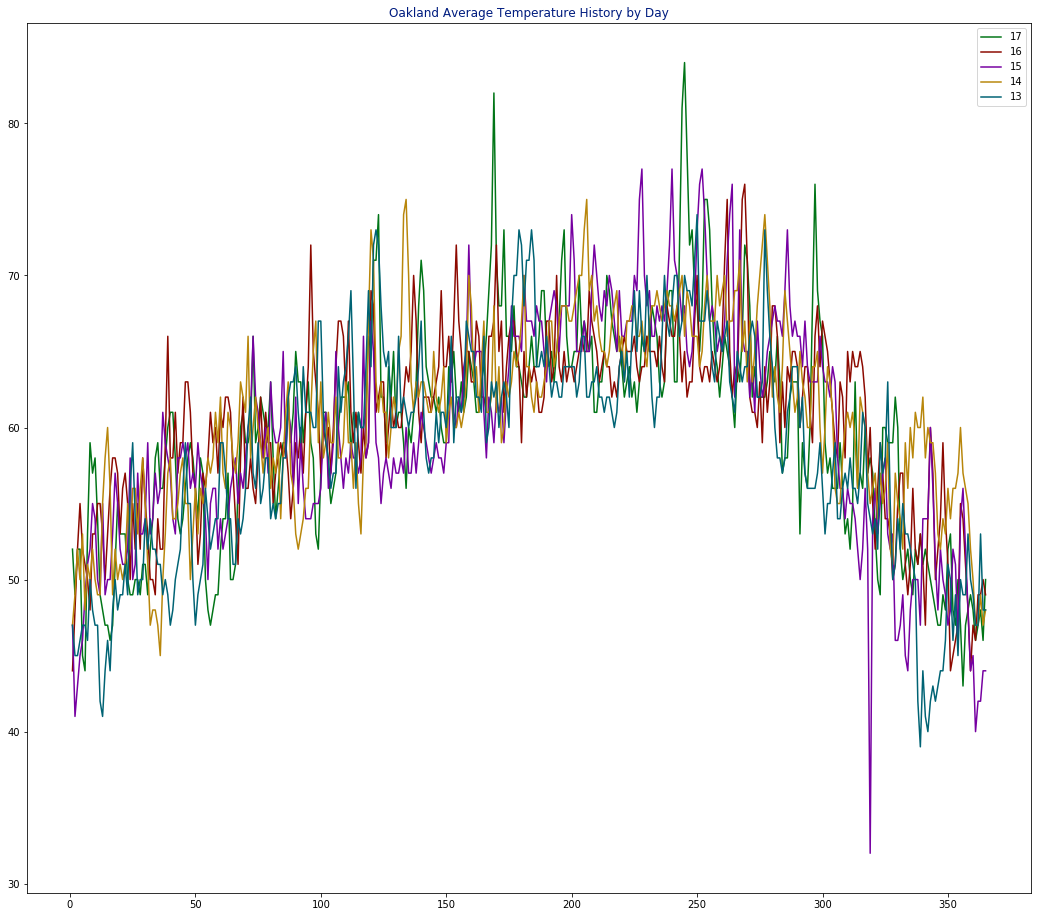

In [5]:
def plot(sty):
    mpl.style.use(sty) 
    f, a = plt.subplots(figsize=(18,16))  
    a.set_title('Oakland Average Temperature History by Day'.format(sty), color='C0') 
    a.plot(X, y, 'C1', label='17')  
    a.plot(A, b, 'C2', label='16') 
    a.plot(X1,y1,'C3', label='15')
    a.plot(A1,b1,'C4', label='14')
    a.plot(X2,y2,'C5', label='13')
    a.legend()

plot('seaborn-dark-palette') 

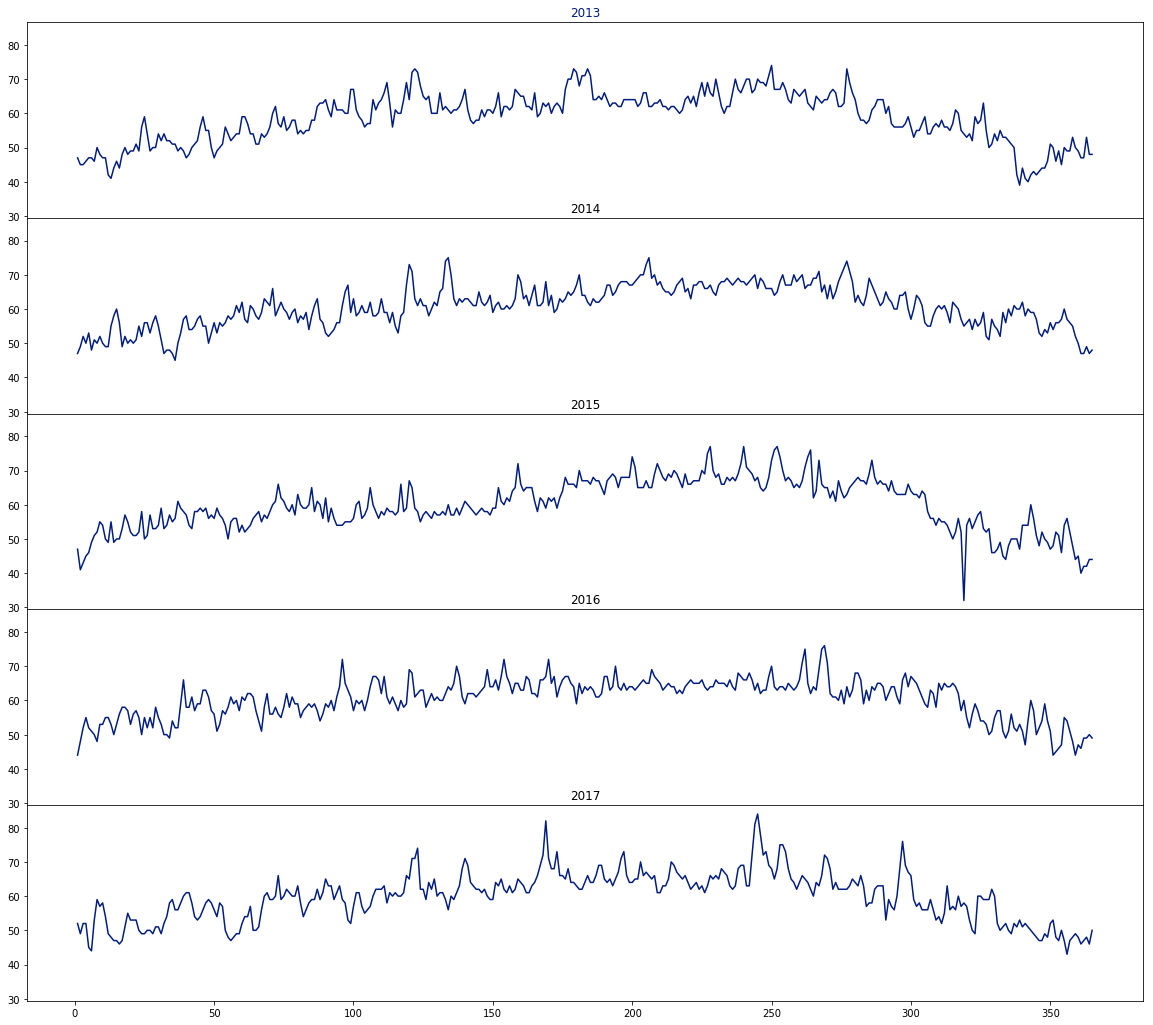

In [6]:
f, (a1, a2, a3, a4, a5) = plt.subplots(5, figsize=(20,18),sharex=True, sharey=True)
a1.plot(X2, y2)
a1.set_title('Oakland Temperature History 2013-2017',color='C0')
a2.plot(A1,b1)
a3.plot(X1,y1)
a4.plot(A,b)
a5.plot(X,y)
f.subplots_adjust(hspace=0)
a1.set_title('2013')
a2.set_title('2014')
a3.set_title('2015')
a4.set_title('2016')
a5.set_title('2017')
plt.setp([a.get_xticklabels() for a in f.axes[:-1]], visible=False)

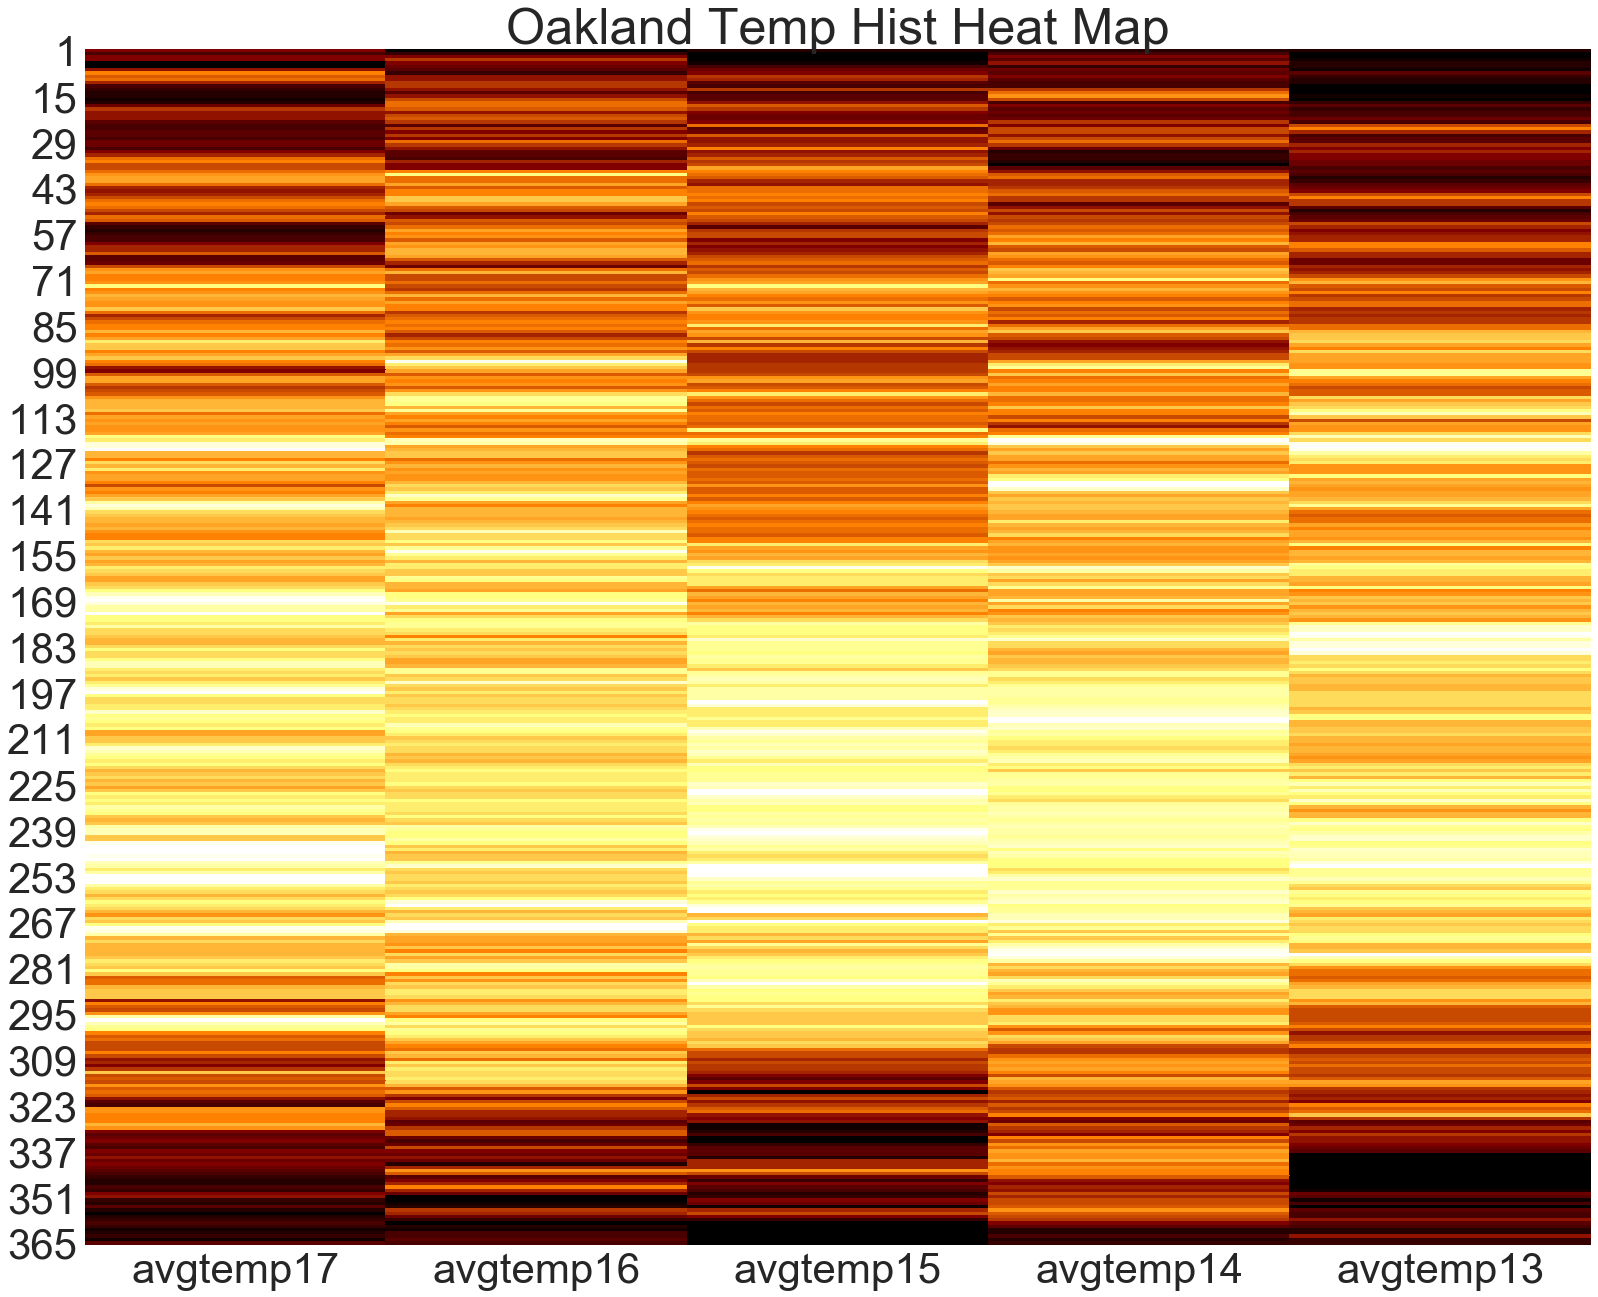

In [7]:
plt.rcParams['figure.figsize'] = (27,22)
X = oaksterdam_temp_hist_alpha.drop("day", axis =1)
sns.set(font_scale=4.2)
a = plt.axes()
sns.heatmap(X, cmap="afmhot", robust=True, cbar=False)
a.set_title('Oakland Temp Hist Heat Map')
plt.show()

In [8]:
# Pearson correlation coefficient - bivariate coefficient - "is a measure of the linear correlation between two variables X and Y." - corr(X,Y) = corr(Y,X).
values = DataFrame(s1.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.897486
t+1  0.897486  1.000000


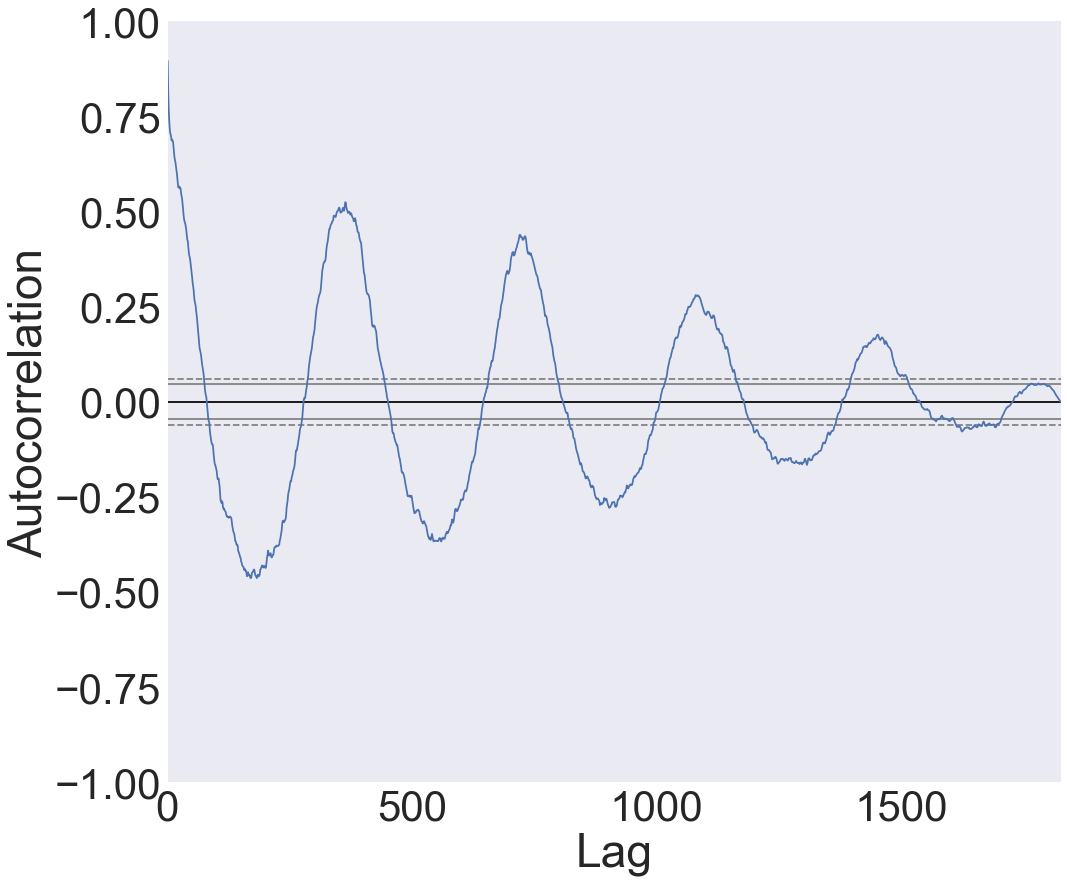

In [9]:
plt.figure(figsize=(16,14))
autocorrelation_plot(s1)

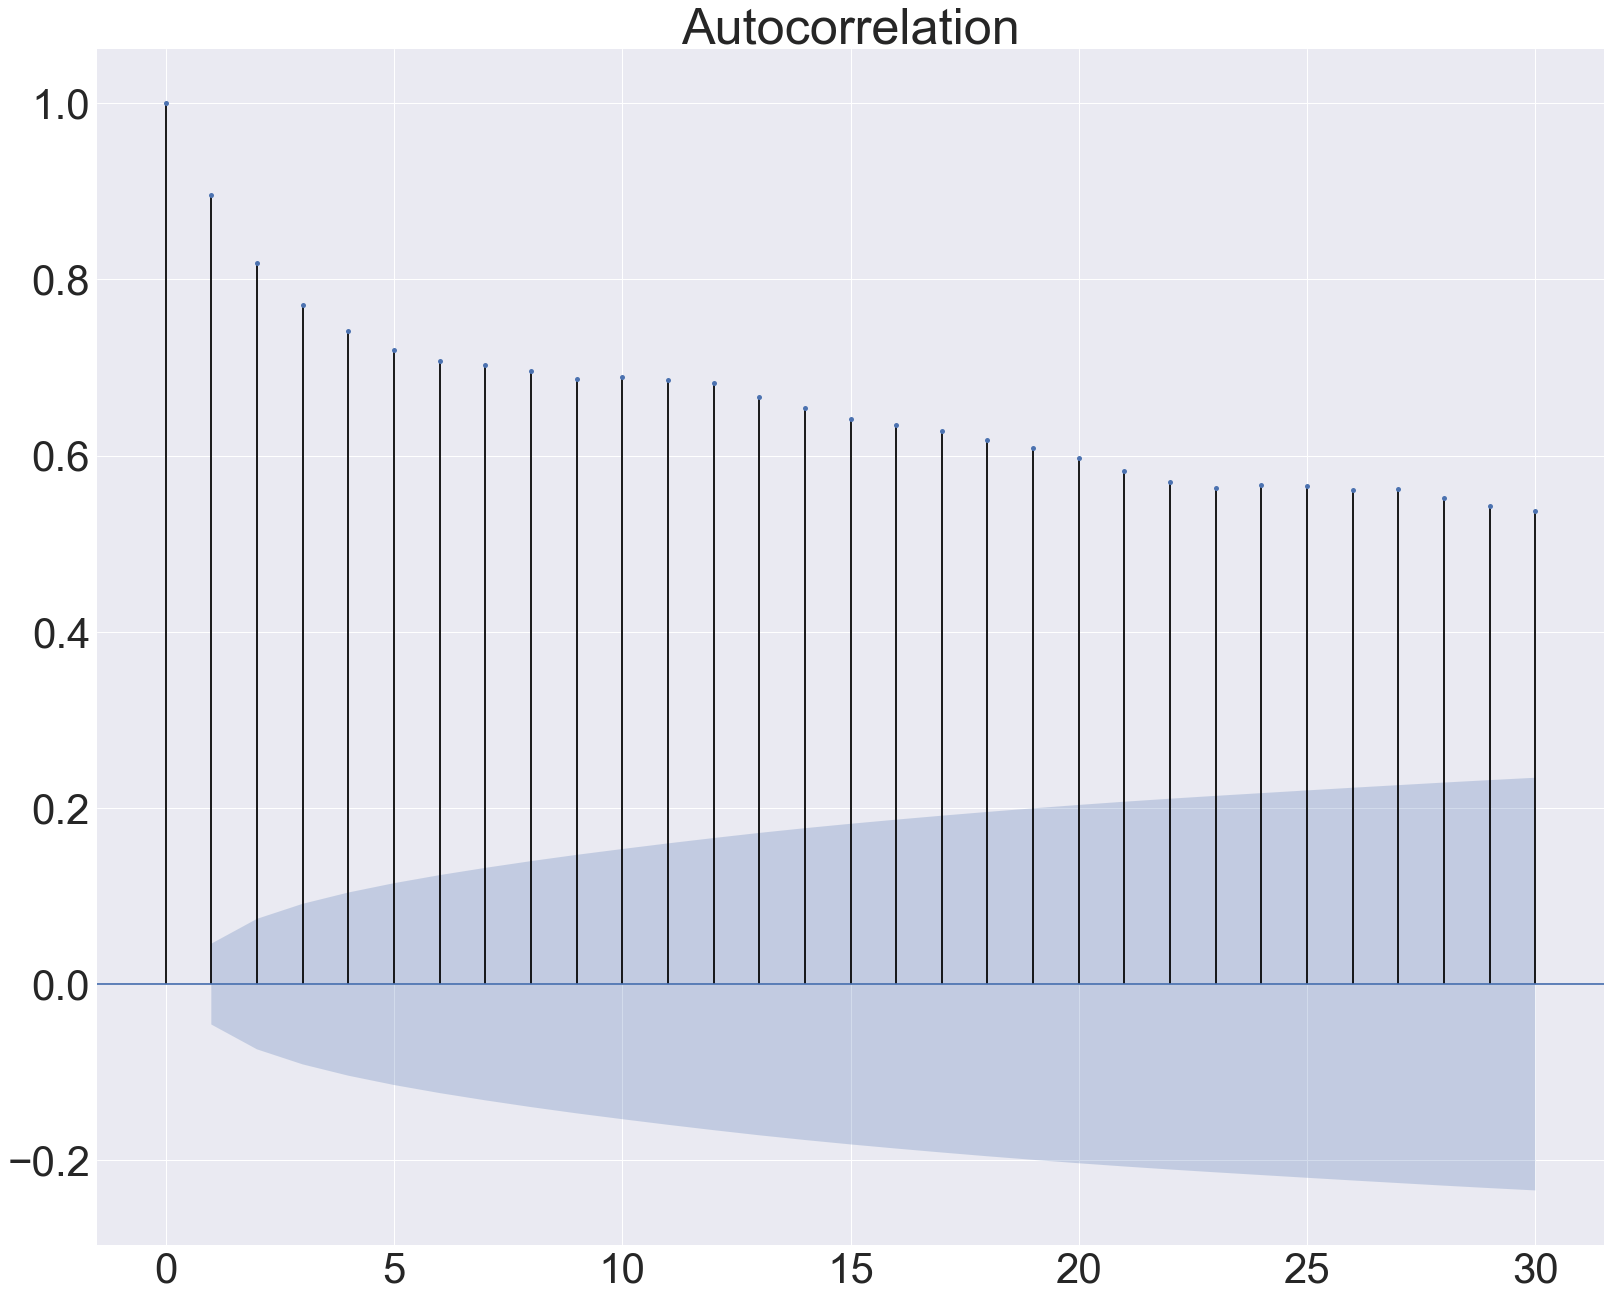

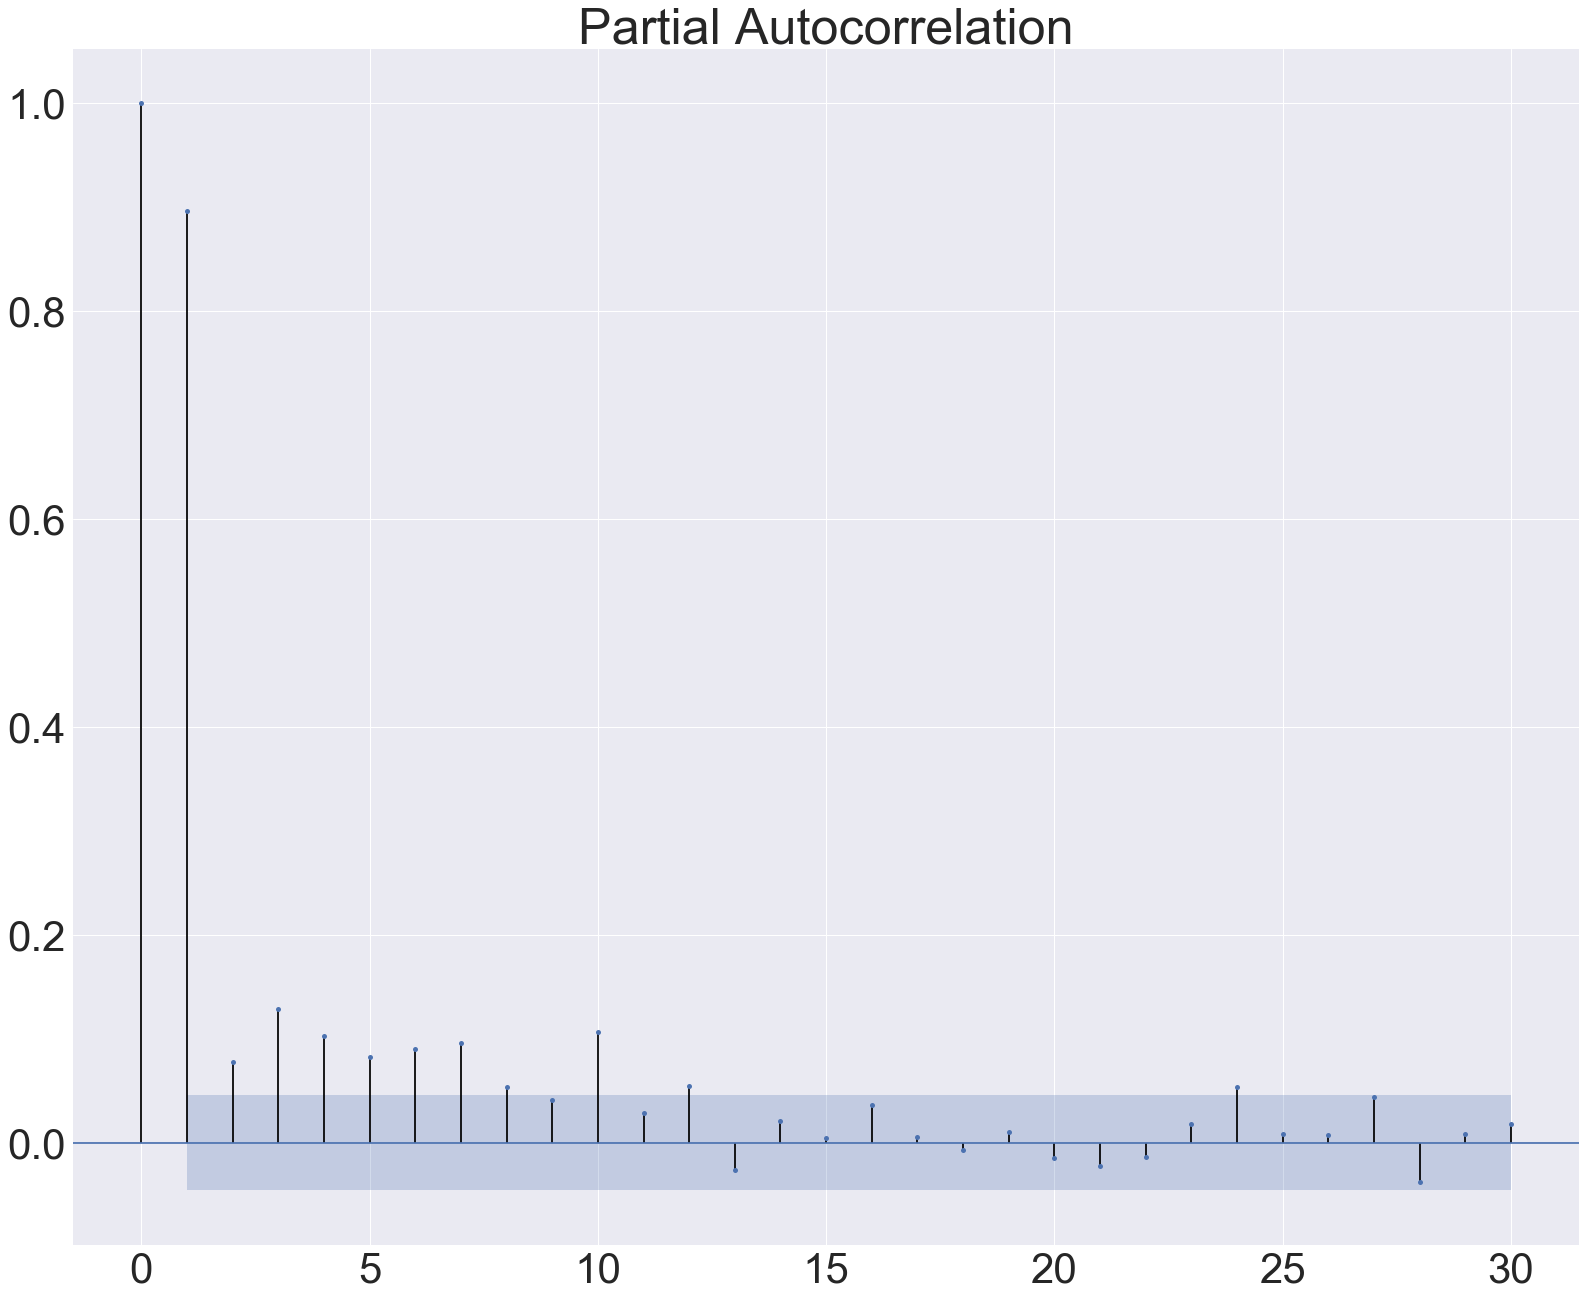

In [10]:
sm.graphics.tsa.plot_acf(s1, lags=30)
sm.graphics.tsa.plot_pacf(s1, lags=30)
pyplot.show()

Test MSE: 4.000


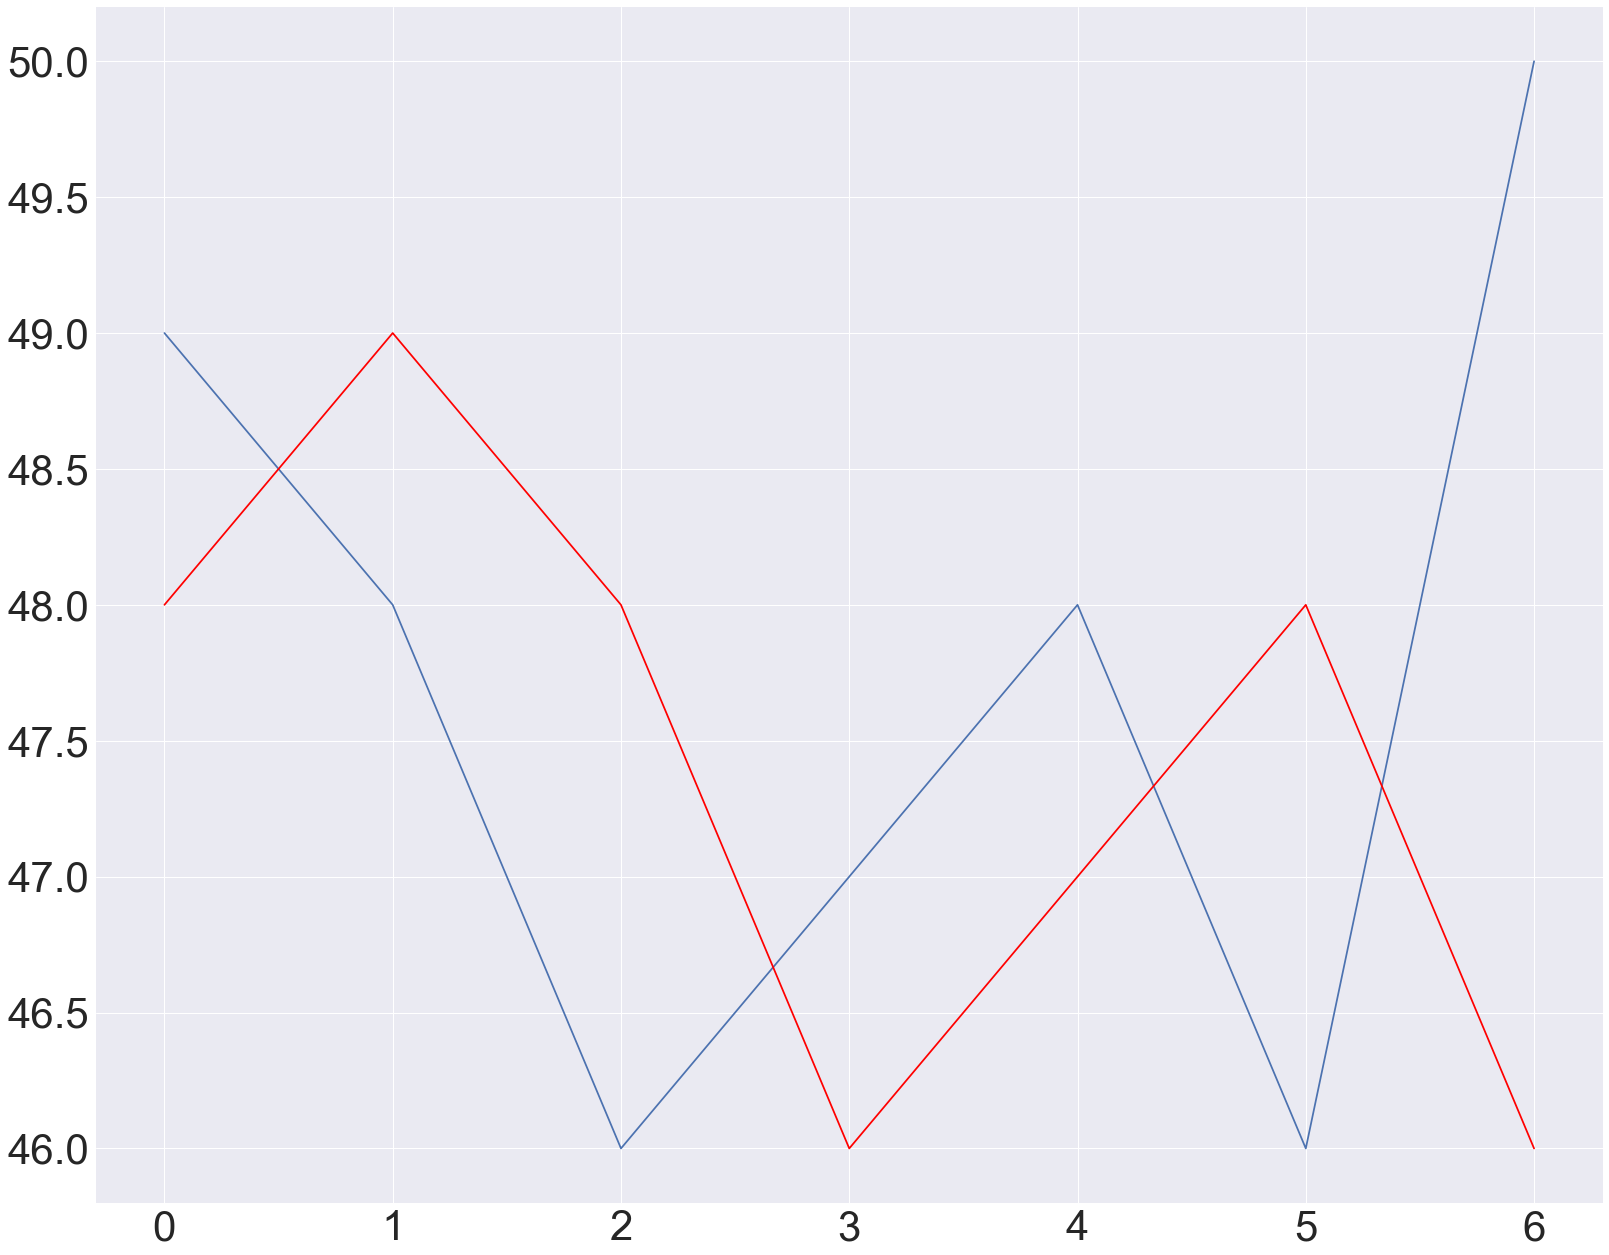

In [11]:
#Persistance Model - "baseline of performance for the problem that we can use for comparison with an autoregression model."

dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']

X = dataframe.values
train, test = X[1:len(X)-7], X[len(X)-7:]
X_train, y_train = train[:,0], train[:,1]
X_test, y_test = test[:,0], test[:,1]
 
def model_persistence(x):
    return x
 

predictions = list()
for x in X_test:
    yhat = model_persistence(x)
    predictions.append(yhat)
test_score = mean_squared_error(y_test, predictions)
print('Test MSE: %.3f' % test_score)

pyplot.plot(y_test) 
pyplot.plot(predictions, color='red')
pyplot.show()

Lag: 25
Coefficients: [ 2.10815470e+00  7.46711994e-01 -4.16471888e-02  3.18474898e-02
  2.49643849e-02  6.70312629e-03  7.49770041e-03  4.87963640e-02
  2.22169970e-02 -4.48100529e-02  9.45937282e-02 -1.40277227e-02
  7.55859599e-02 -3.67634362e-02  1.72631170e-02 -2.19732086e-02
  3.26739919e-02  1.18520526e-02 -1.55756716e-02  2.38247058e-02
  7.20341217e-04 -1.03942159e-02 -2.65900452e-02 -1.65435984e-02
  4.33746238e-02  4.53191739e-03]
predicted=48.538088, expected=48.000000
predicted=48.606795, expected=49.000000
predicted=48.864718, expected=48.000000
predicted=49.471242, expected=46.000000
predicted=49.728940, expected=47.000000
predicted=49.471224, expected=48.000000
predicted=49.519823, expected=46.000000
predicted=49.701660, expected=50.000000
Test MSE: 4.416


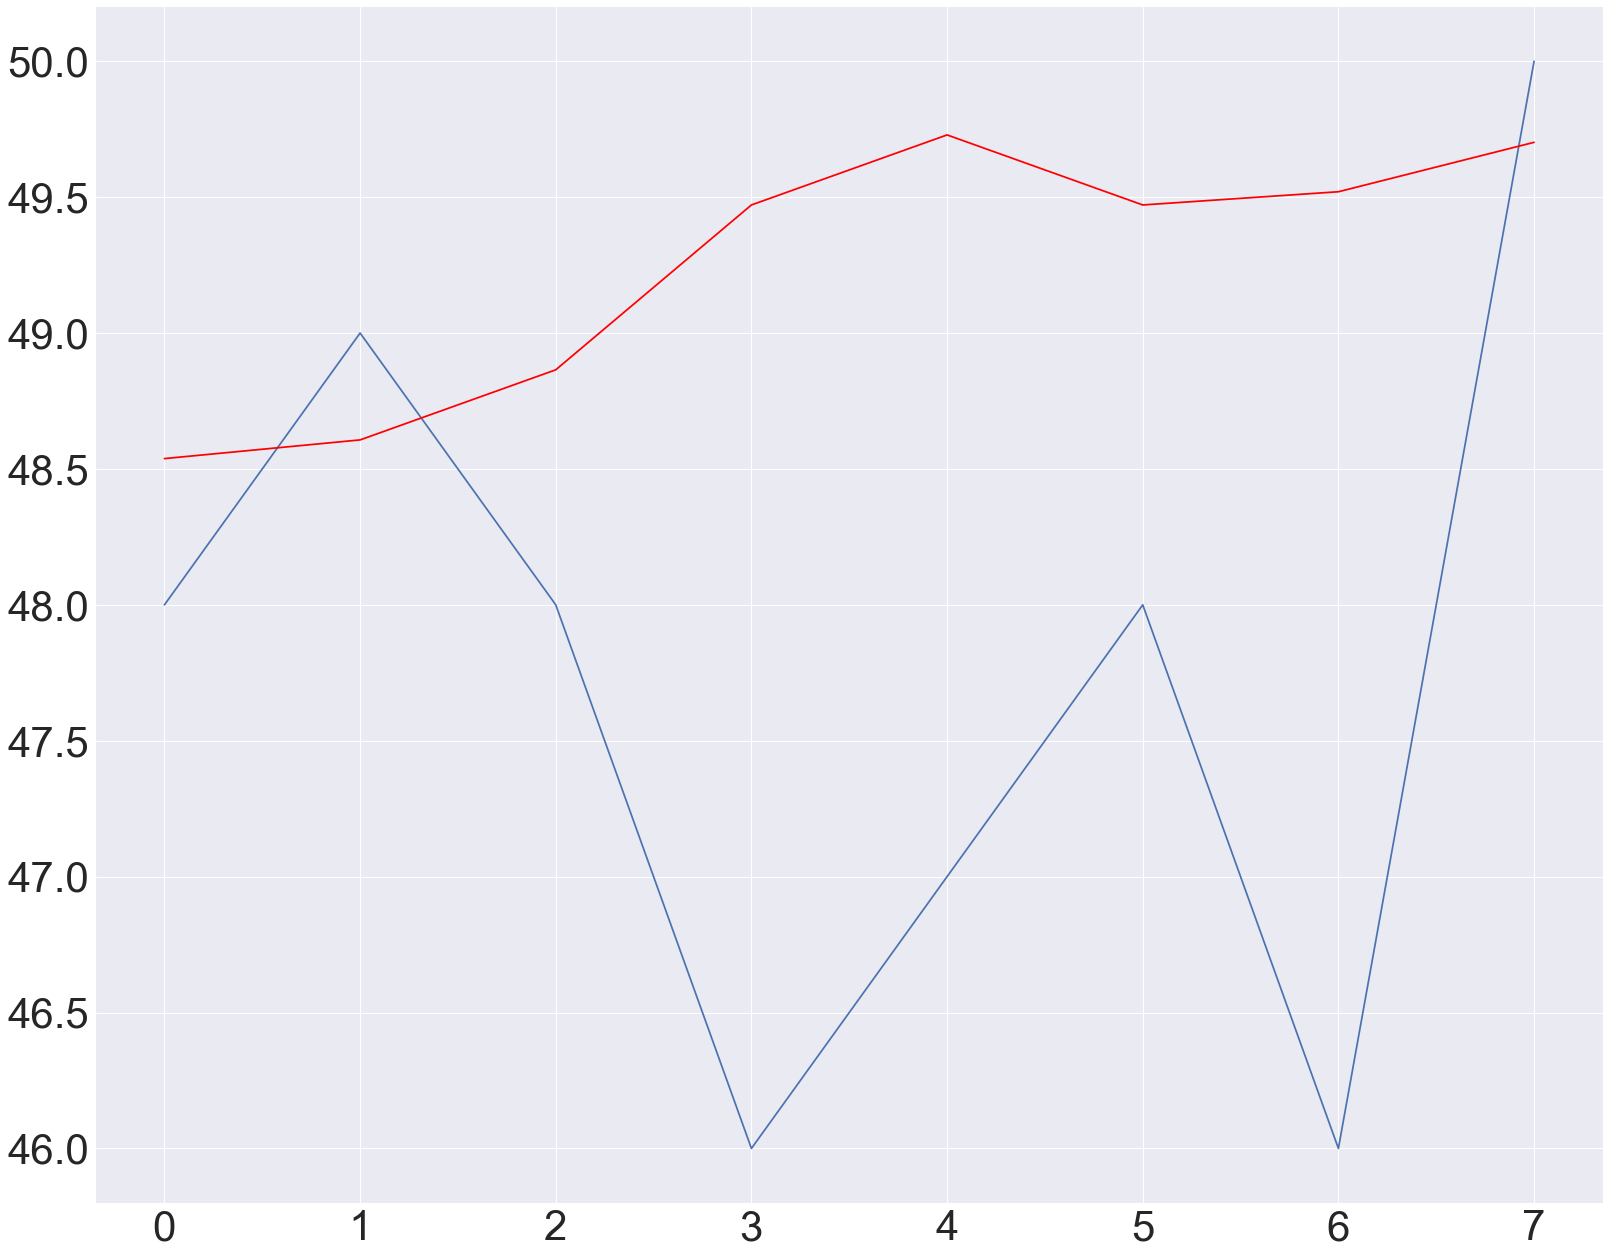

In [12]:
X = s1.values 
train, test = X[1:len(X)-8], X[len(X)-8:]

model = AR(train) 
model_fit = model.fit() 

print('Lag: %s' % model_fit.k_ar) 
print('Coefficients: %s' % model_fit.params) 

predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False) 

for i in range(len(predictions)):
    print('predicted=%f, expected=%f' % (predictions[i], test[i]))
error = mean_squared_error(test, predictions)

print('Test MSE: %.3f' % error)

pyplot.plot(test) 
pyplot.plot(predictions, color='red')
pyplot.show()


predicted=48.204131, expected=49.000000
predicted=49.180111, expected=48.000000
predicted=48.789932, expected=46.000000
predicted=47.170413, expected=47.000000
predicted=47.555889, expected=48.000000
predicted=48.400042, expected=46.000000
predicted=46.930594, expected=50.000000
Test MSE: 3.603


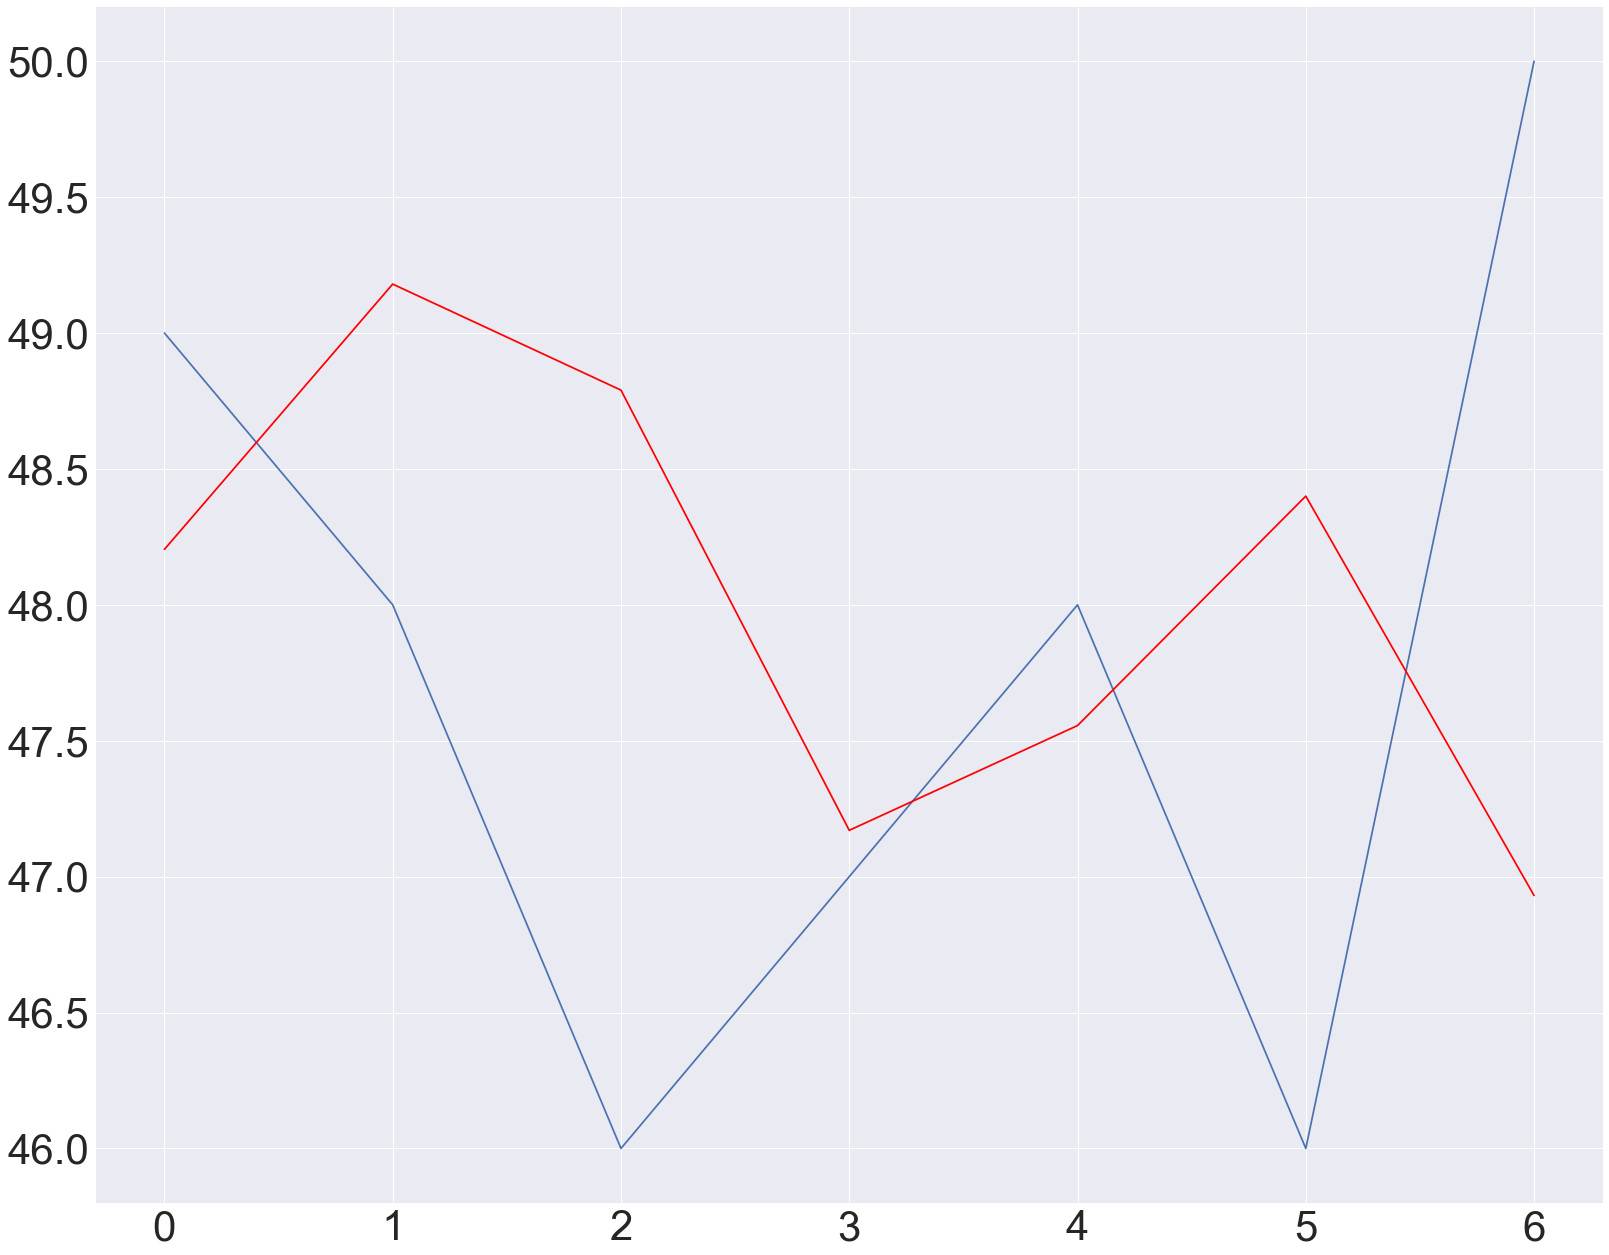

In [20]:
X = s1.values
train, test = X[1:len(X)-7], X[len(X)-7:]

model = AR(train)
model_fit = model.fit()
window = model_fit.k_ar
coef = model_fit.params

history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = list()
for t in range(len(test)):
    length = len(history)
    lag = [history[i] for i in range(length-window,length)]
    yhat = coef[0]
    for d in range(window):
        yhat += coef[d+1] * lag[window-d-1]
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Observations: 913
Training Observations: 457
Testing Observations: 456
Observations: 1369
Training Observations: 913
Testing Observations: 456
Observations: 1825
Training Observations: 1369
Testing Observations: 456


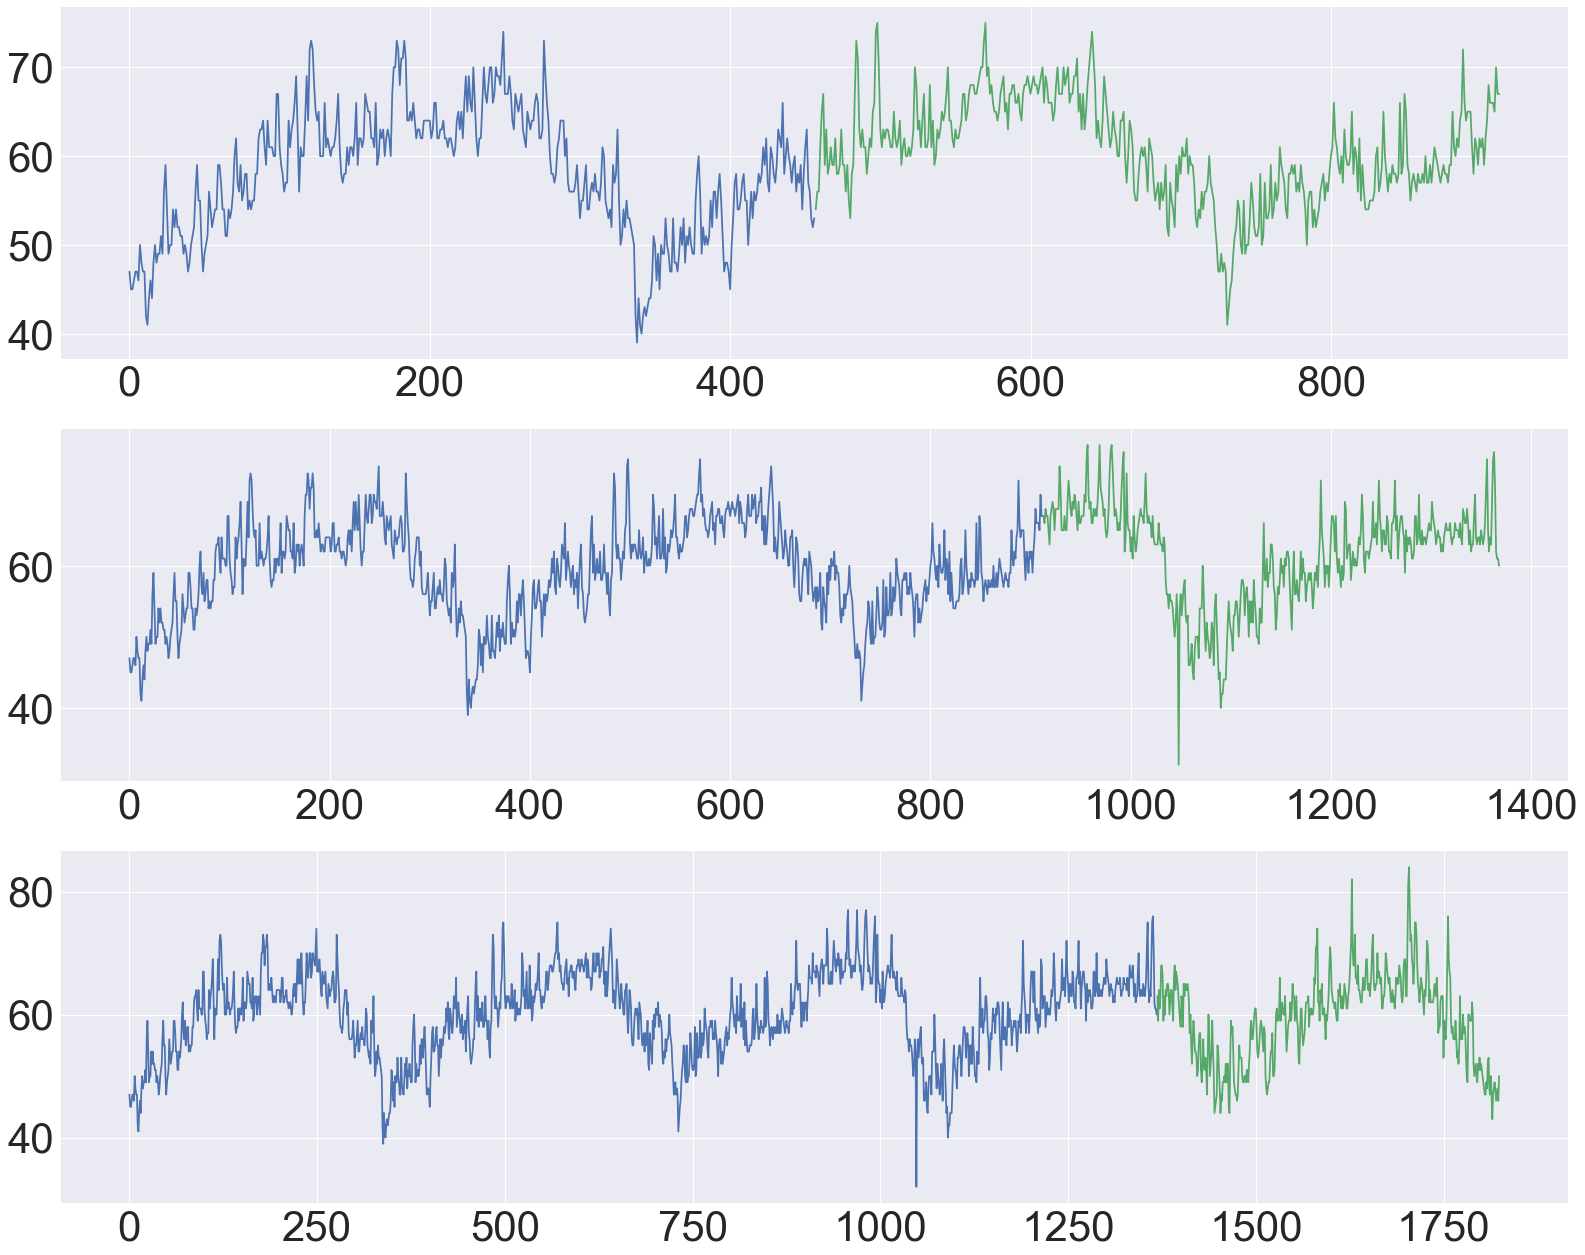

In [33]:
X = s1.values
splits = TimeSeriesSplit(n_splits=3)
pyplot.figure(1)
index = 1
for train_index, test_index in splits.split(X):
    train = X[train_index]
    test = X[test_index]
    print('Observations: %d' % (len(train) + len(test)))
    print('Training Observations: %d' % (len(train)))
    print('Testing Observations: %d' % (len(test)))
    pyplot.subplot(310 + index)
    pyplot.plot(train)
    pyplot.plot([None for i in train] + [x for x in test])
    index += 1
pyplot.show()
